# Campaign Performance Analysis

This notebook contains the analysis and visualizations for campaign performance.

## Step 1: Data Cleaning

In [2]:

import pandas as pd
import re
import matplotlib.pyplot as plt

# Load the data
file_path = 'data.csv'
data = pd.read_csv(file_path)

# Drop Non-Critical Columns with Excessive Missing Values
columns_to_drop = [
    'Formulario', 'Nombre de Campaña', 'UTM Content', 'ID SEAT', 
    '¿Estás dispuesto a invertir al menos US$2.000 para generar crecimiento? ex - TRABAJAS EN UNA CLINICA', 
    '¿Eres dueño de una clínica?', 
    '¿Cuál es el valor promedio de un tratamiento o servicio en tu clínica? (Dólares estadounidenses) * *', 
    '¿Cuál es tu rol en la clínica?', '¿Qué tipo de publicidad usas?', 
    '¿Cuál es el valor promedio de un tratamiento o servicio en tu clínica? ', 
    '¿Qué tan importante para ti es escalar las ventas de tu negocio?', 'Repesca wz', 'ESPECIALIDAD', 'PreCalifica', 'NOMBRE DEL CENTRO', 
    'Agendó Reunión Automáticamente', 'Fecha de la Reunión (R1)', 'Triaje', 'Fecha de contacto', 'Lead Calificado', 
    'Comentario/Observaciones', 'Agendó R1 (Stefi)', 'Fecha R1 (Stefi)', 'Status R1', 'Agendó R2', 'Status R2', '¿Cierre?', 
    'Fecha de cierre', 'Respuestas Calificatorias'
]
data.drop(columns=columns_to_drop, inplace=True)

# Standardize Date Formats
data['FECHA'] = pd.to_datetime(data['FECHA'], format='%d/%m/%Y', errors='coerce')

# Clean Up Phone Numbers
def clean_phone_number(phone):
    if pd.isna(phone):
        return phone
    return re.sub(r'\D', '', phone)

data['NUMERO'] = data['NUMERO'].apply(clean_phone_number)
data['NUMERO MEXICO'] = data['NUMERO MEXICO'].apply(clean_phone_number)

# Handle Erroneous Entries
data.replace('#REF!', pd.NA, inplace=True)

# Display cleaned data
data.head()
    

,FECHA,NOMBRE,EMAIL,NUMERO,PAIS,FUENTE,UTM Campaing,CALIFICA,Contactados,LINK CALENDLY,LINK FINAL AGENDA STEFFY,NUMERO MEXICO
0,2023-02-01,TONYARC,-,18298376731,DO,wpp,NaN,No,Si,https://calendly.com/d/cj8g-jrz-cnx/asesoria-d...,Agenda tu Asesoría,18298376731
1,2023-05-01,Mary Criollo,-,593998944850,EC,wpp,NaN,Filtrando,Si,https://calendly.com/d/cj8g-jrz-cnx/asesoria-d...,Agenda tu Asesoría,593998944850
2,2023-05-01,Jefferson Chacon,-,56982267624,CL,wpp,NaN,Filtrando,Si,https://calendly.com/d/cj8g-jrz-cnx/asesoria-d...,Agenda tu Asesoría,56982267624
3,2023-05-01,Ivijufashion,-,18297220357,DO,wpp,NaN,Filtrando,Si,https://calendly.com/d/cj8g-jrz-cnx/asesoria-d...,Agenda tu Asesoría,18297220357
4,2023-05-01,Paul,paulqt12@hotmail.com,593996801353,EC,wpp,NaN,Si,Si,https://calendly.com/d/cj8g-jrz-cnx/asesoria-d...,Agenda tu Asesoría,593996801353


## Step 2: Descriptive Statistics

In [3]:

# Descriptive statistics for numeric columns
descriptive_stats = data.describe()

descriptive_stats
    

,FECHA
count,6215
mean,2023-11-14 15:11:43.781174528
min,2023-02-01 00:00:00
25%,2023-08-23 12:00:00
50%,2023-11-29 00:00:00
75%,2024-02-11 00:00:00
max,2024-05-31 00:00:00


## Step 3: Visualizations

### Visualization 1: Distribution of Countries

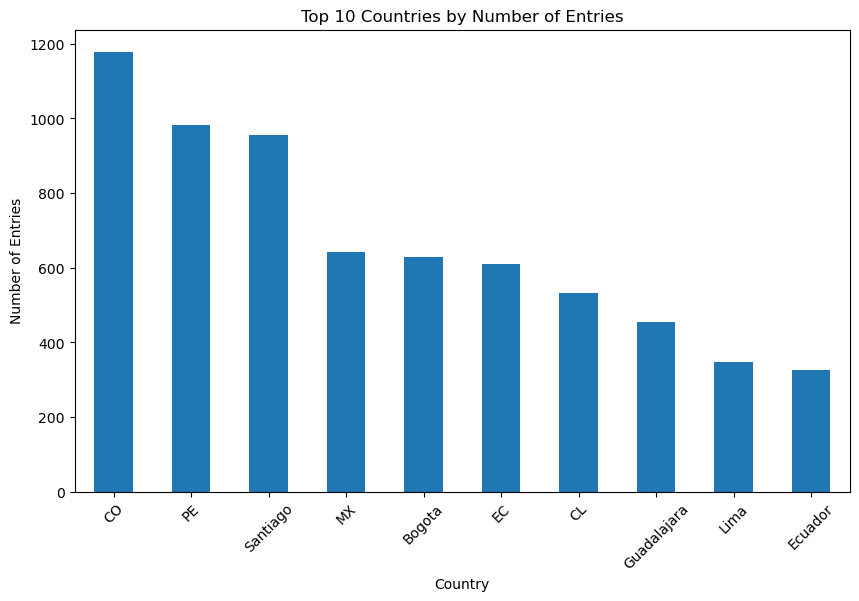

In [4]:

# Top 10 countries by number of entries
top_countries = data['PAIS'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar')
plt.title('Top 10 Countries by Number of Entries')
plt.xlabel('Country')
plt.ylabel('Number of Entries')
plt.xticks(rotation=45)
plt.show()
    

### Visualization 2: Source Distribution

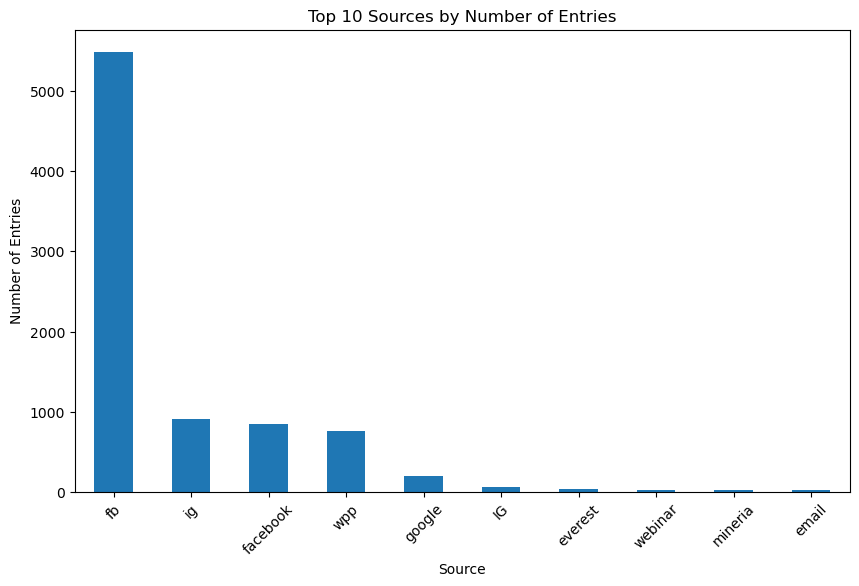

In [5]:

# Top 10 sources by number of entries
top_sources = data['FUENTE'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_sources.plot(kind='bar')
plt.title('Top 10 Sources by Number of Entries')
plt.xlabel('Source')
plt.ylabel('Number of Entries')
plt.xticks(rotation=45)
plt.show()
    

### Visualization 3: Campaign Distribution

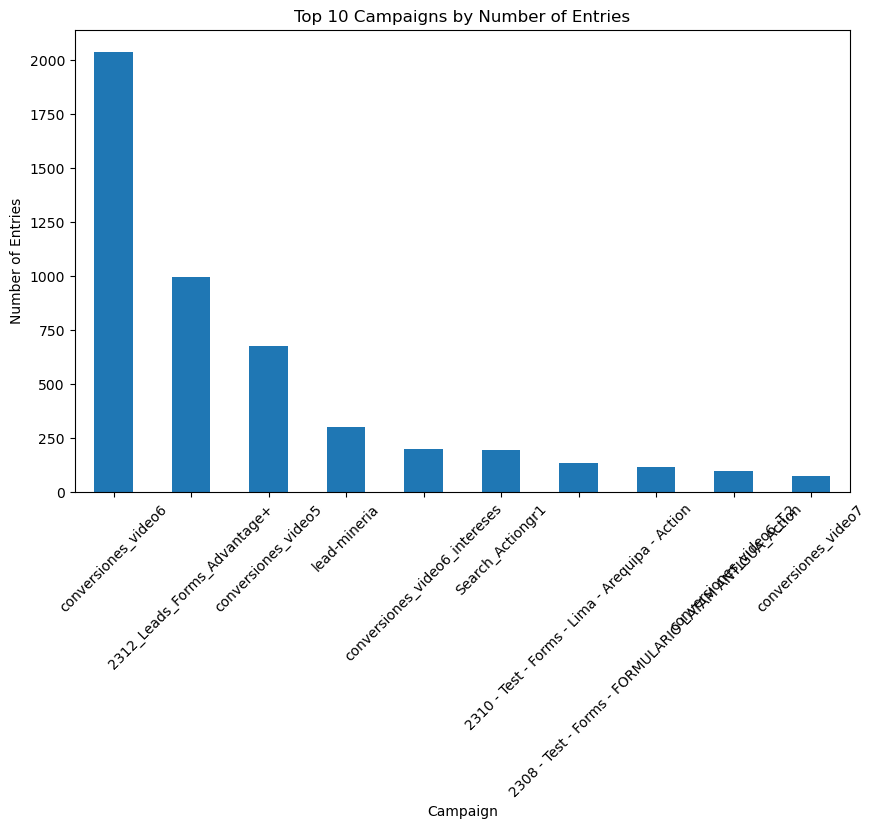

In [6]:

# Top 10 campaigns by number of entries
top_campaigns = data['UTM Campaing'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_campaigns.plot(kind='bar')
plt.title('Top 10 Campaigns by Number of Entries')
plt.xlabel('Campaign')
plt.ylabel('Number of Entries')
plt.xticks(rotation=45)
plt.show()
    

## Step 4: Campaign Performance Analysis

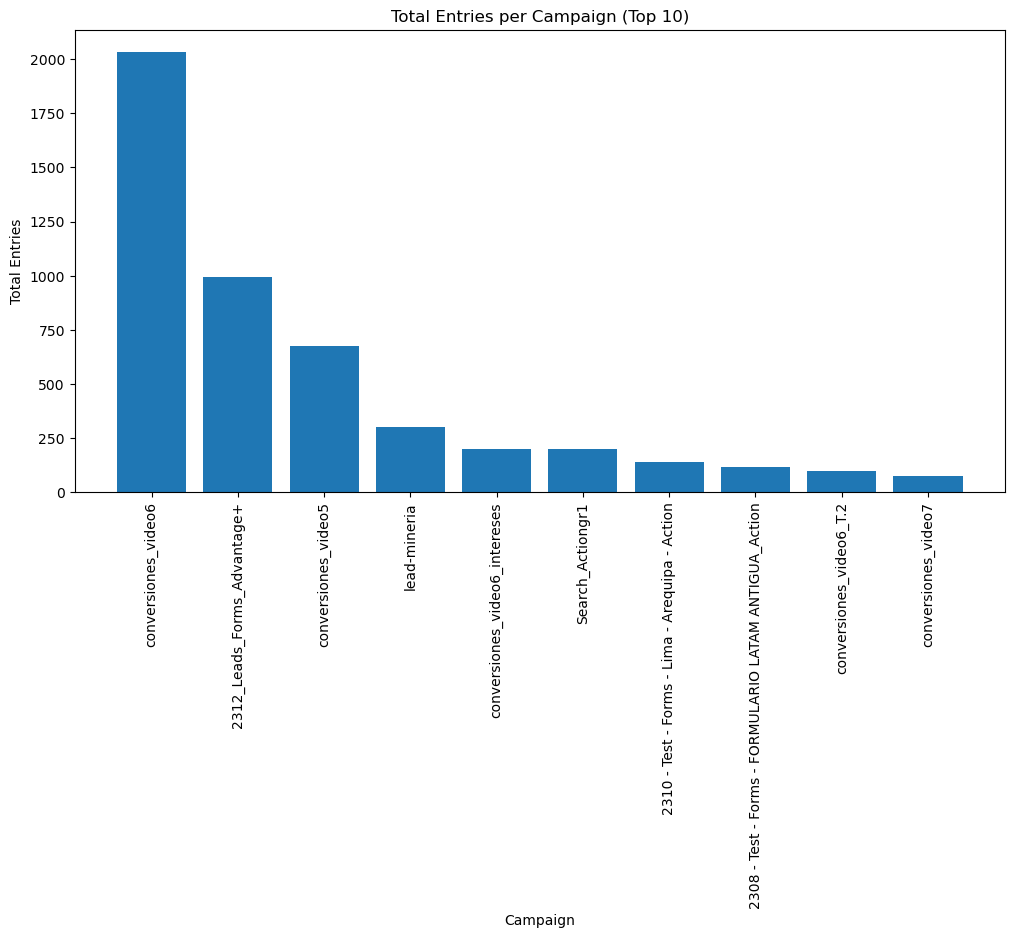

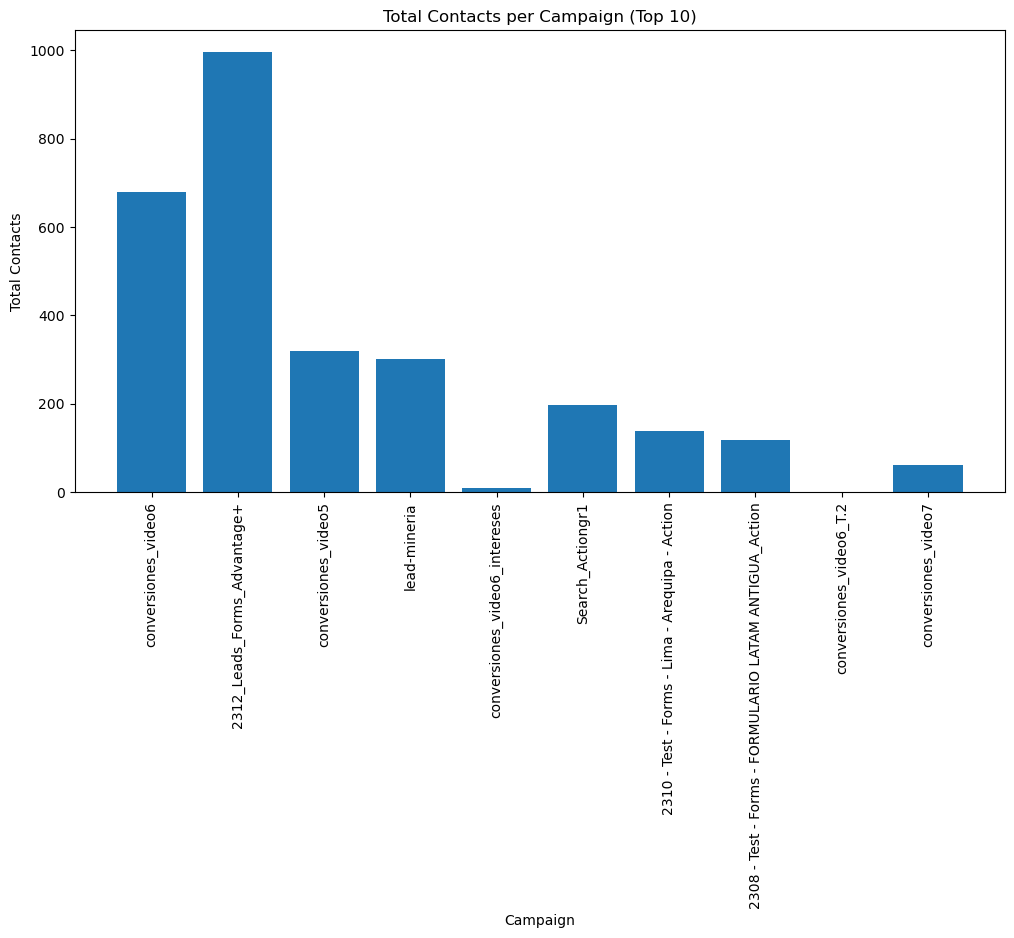

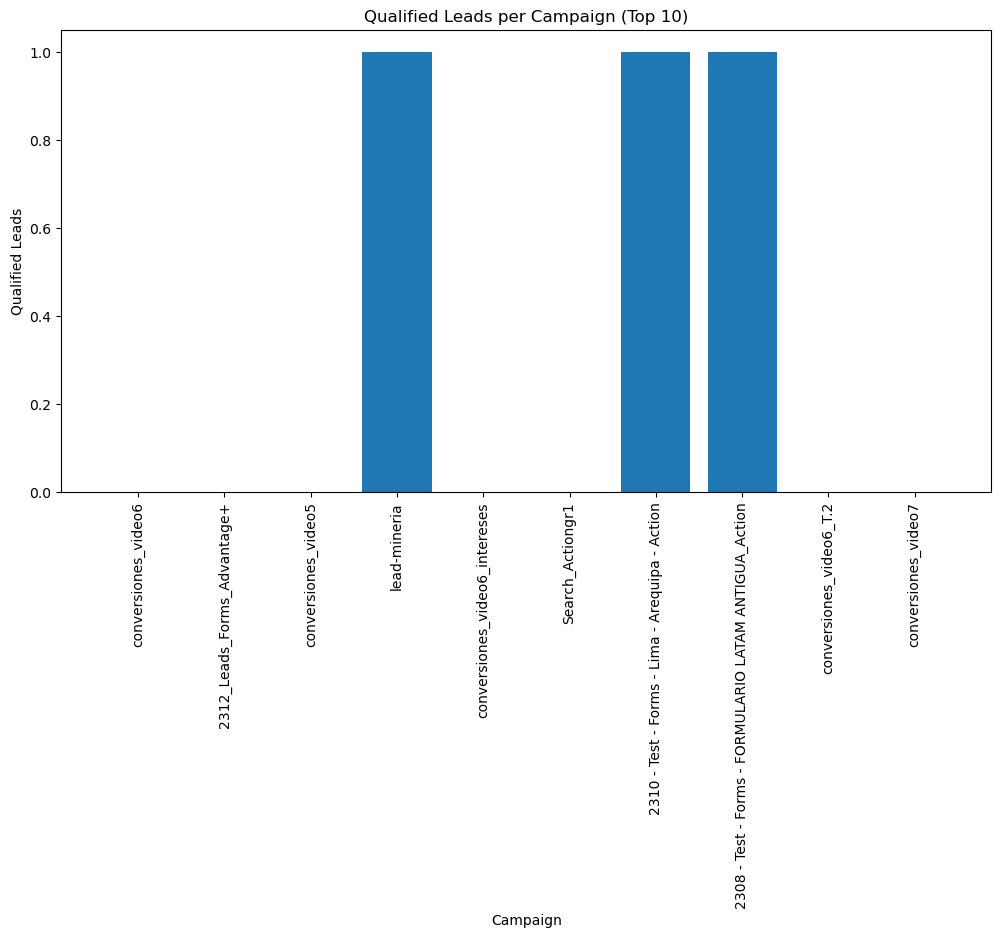

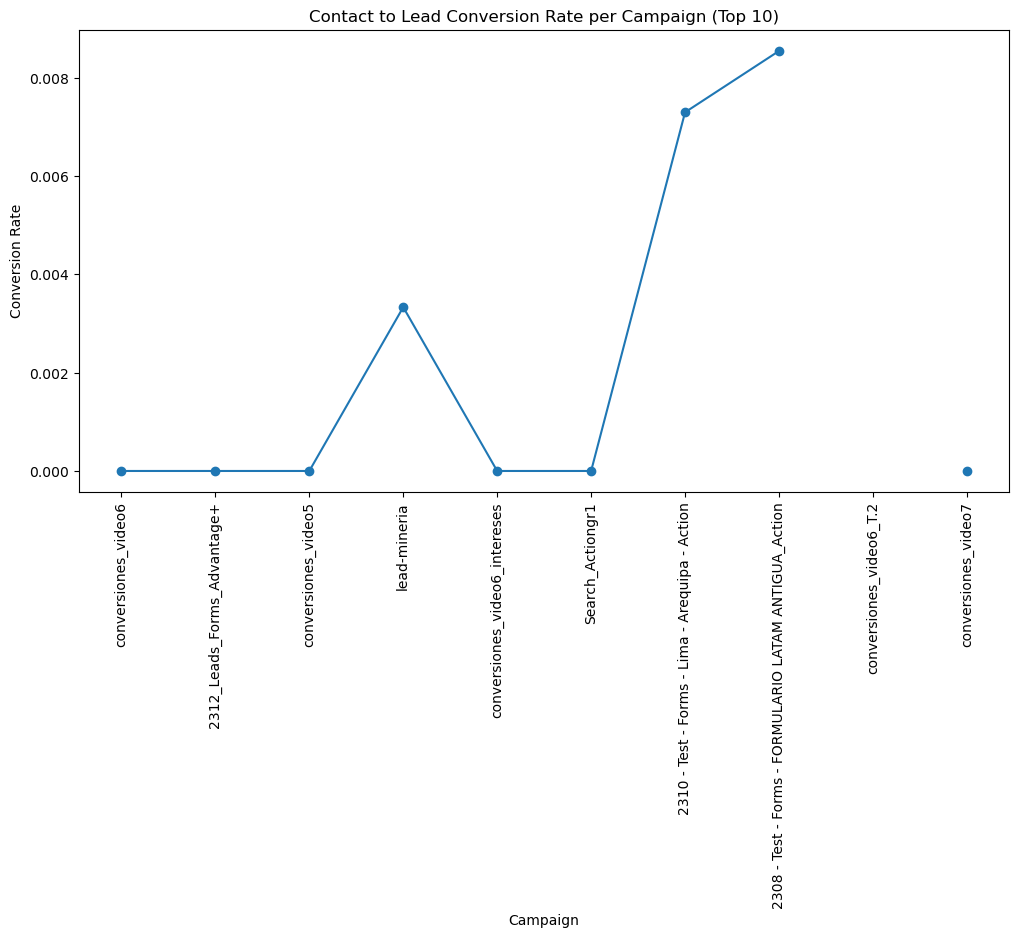

In [7]:

# Step 1: Aggregate Key Metrics by Campaign
campaign_metrics = data.groupby('UTM Campaing').agg({
    'NOMBRE': 'count',  # Total entries
    'Contactados': lambda x: x[x == 'Si'].count(),  # Total contacts
    'CALIFICA': lambda x: x[x == 'Filtrando'].count()  # Total qualified leads
}).rename(columns={
    'NOMBRE': 'Total Entries',
    'Contactados': 'Total Contacts',
    'CALIFICA': 'Qualified Leads'
}).reset_index()

# Step 2: Calculate Conversion Rates
campaign_metrics['Contact to Lead Conversion Rate'] = campaign_metrics['Qualified Leads'] / campaign_metrics['Total Contacts']

# Filter to keep only the first 10 campaigns based on the total entries
top_10_campaigns = campaign_metrics.nlargest(10, 'Total Entries')

# Visualization: Total Entries per Campaign (Top 10)
plt.figure(figsize=(12, 6))
plt.bar(top_10_campaigns['UTM Campaing'], top_10_campaigns['Total Entries'])
plt.title('Total Entries per Campaign (Top 10)')
plt.xlabel('Campaign')
plt.ylabel('Total Entries')
plt.xticks(rotation=90)
plt.show()

# Visualization: Total Contacts per Campaign (Top 10)
plt.figure(figsize=(12, 6))
plt.bar(top_10_campaigns['UTM Campaing'], top_10_campaigns['Total Contacts'])
plt.title('Total Contacts per Campaign (Top 10)')
plt.xlabel('Campaign')
plt.ylabel('Total Contacts')
plt.xticks(rotation=90)
plt.show()

# Visualization: Qualified Leads per Campaign (Top 10)
plt.figure(figsize=(12, 6))
plt.bar(top_10_campaigns['UTM Campaing'], top_10_campaigns['Qualified Leads'])
plt.title('Qualified Leads per Campaign (Top 10)')
plt.xlabel('Campaign')
plt.ylabel('Qualified Leads')
plt.xticks(rotation=90)
plt.show()

# Visualization: Contact to Lead Conversion Rate per Campaign (Top 10)
plt.figure(figsize=(12, 6))
plt.plot(top_10_campaigns['UTM Campaing'], top_10_campaigns['Contact to Lead Conversion Rate'], marker='o')
plt.title('Contact to Lead Conversion Rate per Campaign (Top 10)')
plt.xlabel('Campaign')
plt.ylabel('Conversion Rate')
plt.xticks(rotation=90)
plt.show()
    